In [1]:
from src.classifier import MLClassifier
from src.encoders import TFIDFEncoder
from src.utils import text_preprocessing
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('data/train_augmented_v2.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
classifier = MLClassifier('logreg')
encoder = TFIDFEncoder()

In [4]:
# Prepare dataset
X_train = df_train['text'].values.tolist()
y_train = df_train['label'].values.tolist()
X_processed_train = text_preprocessing(X_train)
y_train = [label.strip() for label in y_train]

X_test = df_test['text'].values.tolist()
y_test = df_test['label'].values.tolist()
X_processed_test = text_preprocessing(X_test)
y_test = [label.strip() for label in y_test]



In [5]:
X_train = encoder.fit_transform(X_processed_train)

In [6]:
classifier.train_classifier(X_train, y_train, tune_hyperparameters=True)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.2s


/Users/danielrodriguez/.pyenv/versions/3.10.13/envs/kaggle_nlp/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/danielrodriguez/.pyenv/versions/3.10.13/envs/kaggle_nlp/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/danielrodriguez/.pyenv/versions/3.10.13/envs/kaggle_nlp/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/danielrodriguez/.pyenv/versions/3.10.13/envs/kaggle_nlp/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/danielrodriguez/.pyenv/versions/3.10.13/envs/kaggle_nlp/lib/python3.10/site-packages/sklearn/svm/_base.py:123

[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ................C=100, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ................C=1.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=1.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=1

/Users/danielrodriguez/.pyenv/versions/3.10.13/envs/kaggle_nlp/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/danielrodriguez/.pyenv/versions/3.10.13/envs/kaggle_nlp/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=1.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=1.0, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=1.0, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0

/Users/danielrodriguez/.pyenv/versions/3.10.13/envs/kaggle_nlp/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [7]:
X_test = encoder.transform(X_processed_test)


In [8]:
_, class_report, confusion_matrix = classifier.evaluate_classifier(X_test, y_test)

Accuracy: 0.62


In [9]:
print(class_report)

               precision    recall  f1-score   support

    Education       0.60      0.86      0.70        97
Entertainment       0.75      0.46      0.57        96
  Environment       0.73      0.51      0.60       171
      Fashion       0.73      0.93      0.82       105
      Finance       0.70      0.49      0.58        82
         Food       0.20      0.42      0.27        24
       Health       0.73      0.65      0.69       165
     Politics       0.72      0.71      0.72       119
      Science       0.50      0.66      0.57        76
       Sports       0.60      0.55      0.58        47
   Technology       0.50      0.55      0.52        75
       Travel       0.33      0.36      0.35        83

     accuracy                           0.62      1140
    macro avg       0.59      0.60      0.58      1140
 weighted avg       0.64      0.62      0.62      1140



<Axes: >

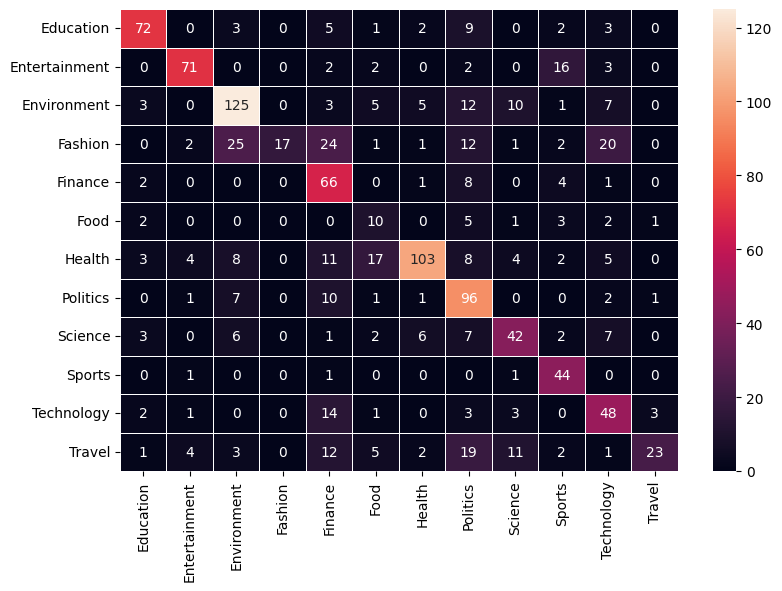

In [42]:
# Display confusion matrix with all the annotations
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", linewidths=.5, ax=ax, xticklabels=classifier.classifier.classes_, yticklabels=classifier.classifier.classes_)



In [43]:
test_predictions = classifier.predict(X_test)

In [45]:
pd.DataFrame({"ID":list(range(len(test_predictions))),"Label":list(test_predictions)}).to_csv("data/submission_tfidf.csv", index=False)